<a href="https://colab.research.google.com/github/AarthySwetha/FAKE-NEWS-PREDICTION/blob/main/DL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist, imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


(x_train_img, y_train_img), (x_test_img, y_test_img) = fashion_mnist.load_data()
x_train_img = x_train_img / 255.0
x_test_img = x_test_img / 255.0
x_train_img = x_train_img[..., None]  # (28,28,1)
x_test_img = x_test_img[..., None]


num_words = 10000
(x_train_text, y_train_text), (x_test_text, y_test_text) = imdb.load_data(num_words=num_words)

maxlen = 200
x_train_text = pad_sequences(x_train_text, maxlen=maxlen)
x_test_text = pad_sequences(x_test_text, maxlen=maxlen)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
min_train = min(len(x_train_img), len(x_train_text))
min_test = min(len(x_test_img), len(x_test_text))

x_train_img = x_train_img[:min_train]
x_train_text = x_train_text[:min_train]
y_train_img = y_train_img[:min_train]
y_train_text = y_train_text[:min_train]

x_test_img = x_test_img[:min_test]
x_test_text = x_test_text[:min_test]
y_test_img = y_test_img[:min_test]
y_test_text = y_test_text[:min_test]


In [ ]:
from tensorflow.keras import layers, models, Input

img_input = Input(shape=(28,28,1))
x = layers.Conv2D(32, (3,3), activation='relu')(img_input)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)


text_input = Input(shape=(maxlen,))
y = layers.Embedding(input_dim=num_words, output_dim=64)(text_input)
y = layers.LSTM(64)(y)
y = layers.Dense(64, activation='relu')(y)


combined = layers.concatenate([x, y])


output_img = layers.Dense(10, activation='softmax', name='fashion_output')(combined)
output_text = layers.Dense(1, activation='sigmoid', name='sentiment_output')(combined)

model = models.Model(inputs=[img_input, text_input], outputs=[output_img, output_text])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 26, 26,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 13, 13,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 11, 11,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 64)   │    640,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 7744)      │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     33,024 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    991,360 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fashion_output      │ (None, 10)        │      1,930 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sentiment_output    │ (None, 1)         │        193 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,689,483 (6.44 MB)

 Trainable params: 1,689,483 (6.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss={'fashion_output': 'sparse_categorical_crossentropy',
          'sentiment_output': 'binary_crossentropy'},
    metrics={'fashion_output': 'accuracy',
             'sentiment_output': 'accuracy'}
)

history = model.fit(
    [x_train_img, x_train_text],
    {'fashion_output': y_train_img, 'sentiment_output': y_train_text},
    epochs=50,
    batch_size=64,
    validation_data=(
        [x_test_img, x_test_text],
        {'fashion_output': y_test_img, 'sentiment_output': y_test_text}
    )
)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 96s 233ms/step - fashion_output_accuracy: 0.7210 - fashion_output_loss: 0.7667 - loss: 1.3280 - sentiment_output_accuracy: 0.6726 - sentiment_output_loss: 0.5613 - val_fashion_output_accuracy: 0.8633 - val_fashion_output_loss: 0.3874 - val_loss: 0.7158 - val_sentiment_output_accuracy: 0.8585 - val_sentiment_output_loss: 0.3273
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 90s 229ms/step - fashion_output_accuracy: 0.8763 - fashion_output_loss: 0.3535 - loss: 0.5910 - sentiment_output_accuracy: 0.9065 - sentiment_output_loss: 0.2375 - val_fashion_output_accuracy: 0.8723 - val_fashion_output_loss: 0.3622 - val_loss: 0.6980 - val_sentiment_output_accuracy: 0.8650 - val_sentiment_output_loss: 0.3354
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 231ms/step - fashion_output_accuracy: 0.8947 - fashion_output_loss: 0.2873 - loss: 0.4584 - sentiment_output_accuracy: 0.9359 - sentiment_output_loss: 0.1711 - val_fashion_output_accuracy: 0.8809 - val_fashion_output_

In [ ]:

results = model.evaluate(
    [x_test_img, x_test_text],
    {'fashion_output': y_test_img, 'sentiment_output': y_test_text}
)


test_loss = results[0]
fashion_loss = results[1]
sentiment_loss = results[2]

fashion_acc = results[3]
sentiment_acc = results[4]


print(f"Total Test Loss: {test_loss:.4f}")
print(f"Fashion MNIST Test Loss: {fashion_loss:.4f}")
print(f"Sentiment Test Loss: {sentiment_loss:.4f}")
print(f"Fashion MNIST Test Accuracy: {fashion_acc * 100:.2f}%")
print(f"Sentiment Test Accuracy: {sentiment_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - fashion_output_accuracy: 0.9058 - fashion_output_loss: 0.8616 - loss: 2.2914 - sentiment_output_accuracy: 0.8560 - sentiment_output_loss: 1.4298
Total Test Loss: 2.2381
Fashion MNIST Test Loss: 0.8114
Sentiment Test Loss: 1.4296
Fashion MNIST Test Accuracy: 90.77%
Sentiment Test Accuracy: 85.40%


In [ ]:

fashion_pred = model.predict([x_test_img[0:1], x_test_text[0:1]])

fashion_mnist_pred = fashion_pred[0]
print(f"Fashion MNIST prediction: {fashion_mnist_pred}")


imdb_sentiment_pred = fashion_pred[1]
print(f"IMDB sentiment prediction: {imdb_sentiment_pred[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
Fashion MNIST prediction: [[7.1363689e-19 2.1386273e-19 7.6610888e-18 8.1363582e-25 2.8128700e-17
  9.1775003e-15 6.5403139e-26 1.8030287e-19 7.0558113e-19 1.0000000e+00]]
IMDB sentiment prediction: [8.490272e-09]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


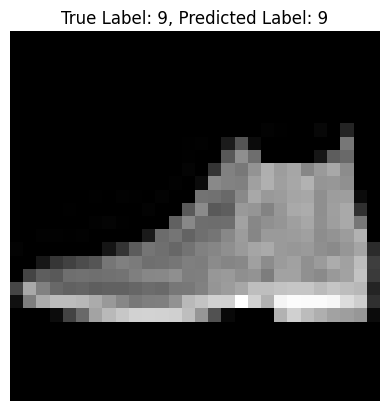

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx = 0

img = x_test_img[idx].reshape(28, 28)
true_label = y_test_img[idx]

predicted_class_prob = model.predict([x_test_img[idx:idx+1], x_test_text[idx:idx+1]])
predicted_class = np.argmax(predicted_class_prob[0])
plt.imshow(img, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()


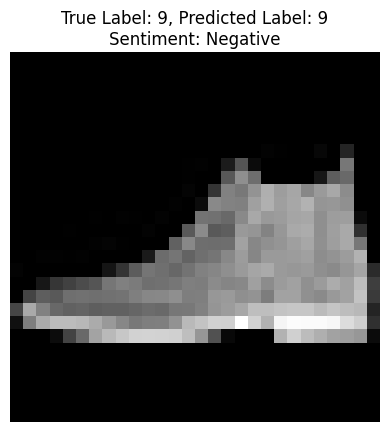

In [ ]:

sentiment_prob = predicted_class_prob[1]
sentiment_pred = 'Positive' if sentiment_prob > 0.5 else 'Negative'

plt.imshow(img, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_class}\nSentiment: {sentiment_pred}")
plt.axis('off')
plt.show()


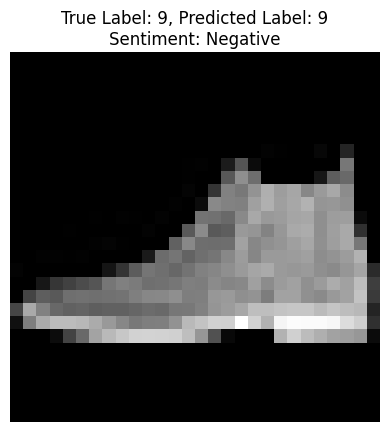

In [ ]:

sentiment_prob = predicted_class_prob[1]


sentiment_pred = 'Positive' if sentiment_prob > 0.5 else 'Negative'


plt.imshow(img, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_class}\nSentiment: {sentiment_pred}")
plt.axis('off')
plt.show()


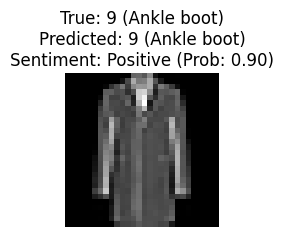

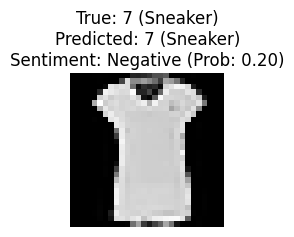

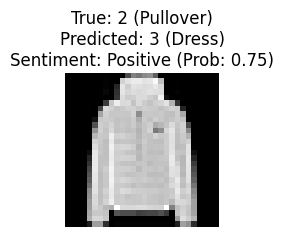

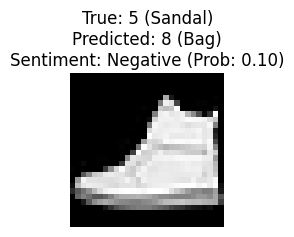

In [ ]:
import matplotlib.pyplot as plt
import random


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def display_prediction(true_label_idx, predicted_label_idx, sentiment_prob):

    true_label_name = class_names[true_label_idx]
    predicted_label_name = class_names[predicted_label_idx]


    sentiment = 'Positive' if sentiment_prob > 0.5 else 'Negative'


    plt.figure(figsize=(2,2))
    plt.imshow(x_test_img[random.randint(0, len(x_test_img)-1)].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label_idx} ({true_label_name})\n"
              f"Predicted: {predicted_label_idx} ({predicted_label_name})\n"
              f"Sentiment: {sentiment} (Prob: {sentiment_prob:.2f})")
    plt.show()




display_prediction(true_label_idx=9, predicted_label_idx=9, sentiment_prob=0.9)


display_prediction(true_label_idx=7, predicted_label_idx=7, sentiment_prob=0.2)


display_prediction(true_label_idx=2, predicted_label_idx=3, sentiment_prob=0.75)


display_prediction(true_label_idx=5, predicted_label_idx=8, sentiment_prob=0.1)


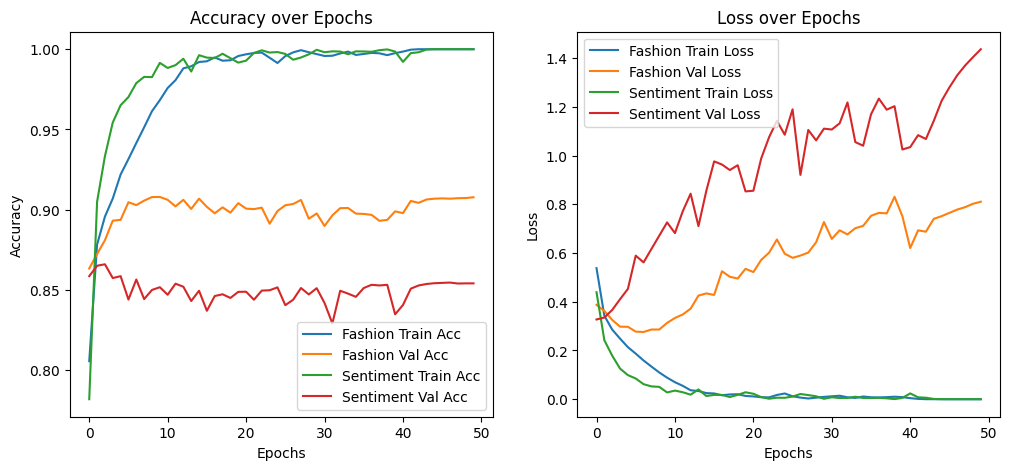

In [ ]:


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['fashion_output_accuracy'], label='Fashion Train Acc')
plt.plot(history.history['val_fashion_output_accuracy'], label='Fashion Val Acc')
plt.plot(history.history['sentiment_output_accuracy'], label='Sentiment Train Acc')
plt.plot(history.history['val_sentiment_output_accuracy'], label='Sentiment Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['fashion_output_loss'], label='Fashion Train Loss')
plt.plot(history.history['val_fashion_output_loss'], label='Fashion Val Loss')
plt.plot(history.history['sentiment_output_loss'], label='Sentiment Train Loss')
plt.plot(history.history['val_sentiment_output_loss'], label='Sentiment Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
